$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Term Project: Predicting Rental Posting Interest Levels

Ethan Loza

## Abstract

In this project I studied how to predict the interest level of a rental posting based on 5 basic characteristics of a rental posting. LDA, nonlinear logistic and linear logistic models were used to predict the interest level of potential renters. The best model produced around 60% accuracy.

## Introduction

In this project I am using a dataset provided by RentHop covering gathered data from rental listings in New York from April 2016 to June 2017. RentHop is an alternative to Craigslist that solely focuses on rentals. In addition to hosting rental postings, RentHop also manages renter and owner information, roommate matching, and rental matching. For this particular dataset, RentHop has aggregated an interest levels for each listing that is classified on a scale from 'High', 'Medium', and 'Low'. These interest classifications were predetermined by RentHop and calculated from the number of inquiries from their website. In addition to the interest levels, RentHop has also provide all of the meta-data associated with each listing. The goal of this project is to determine if there is a model that can predict the interest level in a rental's posting based on the provided attributes. This project will take advantage of the classification machine learning models learned in class, specifically: LDA and linear and nonlinear logistic classification models. I will first explore the data to look for any initial discernible trends, then will incrementally build a machine learning model on the trends that I begin to discover. As soon to be graduate, I will be moving out of Fort Collins for a new job and will have to start looking for a new place to rent. It will be interesting to see what trends affect renter's interest in a rental property.

## Methods

In [51]:
import numpy as np
import pandas as pd 
import mlutils as ml
import neuralnetworks as nn
import qdalda as ql
import matplotlib.pyplot as plt
import math
%matplotlib inline

All of the training data is stored in one json file called: train.json. Reading in the file we can see that each rental listing has the following rental information recorded: # of bathrooms, # of bedrooms, building_id, date listing was created, listing description, display_address, features, interest level, latitude, listing_id, longitude,  manager_id, photos, price, and street_address. The target of this project is the interest_level, while the rest of the recorded features with the exception of listing_id could be used in some form as a predicting feature. We will first begin the model by using only the numeric columns in our machine learning algorithms to get an initial baseline of the data. These features include: # of bedrooms, # of bathrooms, latitude, longitude, and price. These five initial features match with common knowledge about the attributes that affect rental properties: location, price, and size of living space. All other machine learning algorithms will be compared to this initial baseline model.

In [2]:
trainData = pd.read_json('./train.json')
trainData.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


We then need to see if this dataset is clean or dirty, fortunately there are no missing data sets.

In [3]:
trainData.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

We next need to see how the data is distributed within the dataset. It is clear that the data is heavily biased towards the 'low' classification. To get better results, we want to train our learning models on approximately evenly distributed data so that it can see an equal amount of 'low', 'medium', and 'high' rental records. 

In [4]:
trainData['interest_level'].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

We first need categorize our target values 'interest_level' to numerical values that can be represented in a matrix. We will classify 'low'=0, 'medium'=1, and 'high'=2. 

In [5]:
trainData['interest'] = np.where(trainData.interest_level=='low', 0,
                                  np.where(trainData.interest_level=='medium', 1, 2))
trainData['interest'].value_counts()

0    34284
1    11229
2     3839
Name: interest, dtype: int64

Time to create our data matrices. In the makeMatrixData will will create the appropriate X and T matrices that representing the feature and target matrices. Since there is such a high bias towards 'low' interest rental listings and very few 'high' interest listing, well over sample 'high' listings and add two additional set copies of the 'high' interest posting and remove two thirds of 'low' interest postings so there is an approximated even distribution of data that is centered around 11,000 data elements for each category. The method makeMatrixData takes as an input a pandas dataframe object and columns of both the feature and target values that we desired to be used in our model. 

In [8]:
def makeMatrixData(df, featureColumns, targetColumn):
    trainMatrix = df.as_matrix()
    Names = list(trainData.columns.values)
    X = trainMatrix[:, featureColumns]
    T = trainMatrix[:, targetColumn:targetColumn+1]
    Xnames = [Names[index] for index in featureColumns]
    Tnames = Names[targetColumn]
    lowI, _ = np.where(T == 0)
    medI, _ = np.where(T == 1)
    highI, _ = np.where(T == 2)
    lowI = np.random.permutation(lowI)
    nLow = round(len(lowI) / 3)
    rows = np.hstack((lowI[:nLow],medI[:]))
    newX = X[rows, :]
    high = X[highI, :]
    X = np.concatenate((newX, high,high,high), axis=0)
    newT = T[rows, 0:1]
    highT = T[highI, 0:1]
    T = np.concatenate((newT, highT, highT, highT))
    X=X.astype(float)
    T = T.astype(int)
    return X,T,Xnames,Tnames

In [9]:
X,T,Xnames,Tnames = makeMatrixData(trainData,[0,1,8,10,13], 15)

We will use the following functions in in conjunction with qdalda.py, mlutils.py, scaledconjugatecradient.py, and neuralnetworks.py to evalute our LDA and Nonlinear/Linear Logistic classification models.

In [17]:
def trainLDA(X,T,parameters = None):
    lda = ql.LDA()
    lda.train(X,T)
    return lda

def evaluateLDA(model,X,T):
    c, prob, d = model.use(X)
    return np.sum(c == T) / X.shape[0] * 100

def trainNN(X,T,parameters):
    layers = parameters[0]
    iterations = parameters[1]
    nInputs = X.shape[1]
    nOutputs = len(np.unique(T))
    nclass = nn.NeuralNetworkClassifier(nInputs, layers, nOutputs)
    nclass.train(X, T, iterations, False)
    return nclass

def evaluateNN(model,X,T):
    Y = model.use(X)
    return 100*np.sum(Y==T)/len(T)

def printResults(label,results):
    print('{:4s} {:>20s}{:>8s}{:>8s}{:>8s}'.format('Algo','Parameters','TrnAcc','ValAcc','TesAcc'))
    print('-------------------------------------------------')
    for row in results:
        # 20 is expected maximum number of characters in printed parameter value list
        print('{:>4s} {:>20s} {:7.2f} {:7.2f} {:7.2f}'.format(label,str(row[0]),*row[1:]))
        
def printAvg (lable, results):
    avgResults = np.array(results)
    avgResults = avgResults[:, 1:]
    avgResults = np.mean(avgResults, axis=0)
    print('-------------------------------------------------')
    print('{:>4s} {:>20s} {:7.2f} {:7.2f} {:7.2f}'.format("Average:","  ",*avgResults[:]))

#### Baseline Model Testing

With our initial features and targets defined and all of our functions declared, we can now begin our baseline tests using # of bathrooms, # of bedrooms, latitude, longitude, and price. We first look at our LDA model:

In [47]:
XTrain,TTrain,XTest,TTest = ml.partition(X,T,(.8,.2),classification=True)
classes = ['Low', 'Medium', 'High']

In [42]:
resultsLDA = ml.trainValidateTestKFoldsClassification( trainLDA,evaluateLDA, X,T, [None],
                                                       nFolds=10, shuffle=True,verbose=False)
printResults('LDA:',resultsLDA)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   51.49   49.24   56.45
LDA:                 None   53.89   51.11   58.65
LDA:                 None   54.12   51.36   57.61
LDA:                 None   54.33   51.29   56.46
LDA:                 None   54.46   51.51   55.69
LDA:                 None   54.71   51.58   53.44
LDA:                 None   54.87   51.92   51.33
LDA:                 None   55.03   51.98   48.36
LDA:                 None   55.20   52.99   43.71
LDA:                 None   55.11   53.29   37.00


In [43]:
printAvg("LDA", resultsLDA)

-------------------------------------------------
Average:                        54.32   51.63   51.87


With an LDA model we are achieving a baseline accuracy of 51.87%. Not the best, but slightly better than average. Let's see what $\mu$ values the LDA model assigned for each input feature.

In [48]:
LDAModel = trainLDA(XTrain, TTrain)
mu = LDAModel.mu
print(' '*20, end='')
for cl in classes:
    print("{:^10}".format(cl), end='')
print()
for i,name in enumerate(Xnames):
    print("{:>20}".format(name[:18]), end='')
    for j,clas in enumerate(classes):
        print("{:^10.2f}".format(mu[j][i][0]), end='')
    print()

                       Low      Medium     High   
           bathrooms   0.15     -0.02     -0.13   
            bedrooms  -0.04      0.05     -0.01   
            latitude  -0.02      0.01      0.01   
           longitude   0.02     -0.01     -0.01   
               price   0.04     -0.01     -0.03   


In [74]:
Ptrain,Prtrain,_ = LDAModel.use(XTrain)
Ptest,Prtest,_ = LDAModel.use(XTest)
print('ConfusionMatrix')
print()
ml.confusionMatrix(TTest,Ptest,np.unique(TTest));

ConfusionMatrix

       0    1    2
    ------------------
 0 | 38.7  1.4 59.8   (2286 / 2286)
 1 | 34.3  0.4 65.3   (2246 / 2246)
 2 | 33.7  0.0 66.2   (2303 / 2303)


As we can see the LDA model is weighting the number of bathrooms to predict the 'low' and 'high' categories, but nothing else. This is further demonstrated in the confusion matrix where the majority of rental postings are either getting categorized as 'low' or 'high'. Now to see how the linear and non-linear logistic classification models will test.

In a paper published by Huang, a standard neural network contains two hidden layers were the number of hidden units are defined as:

In [55]:
def hiddenLayers(ni,no):
    n1 = int (math.ceil(math.sqrt((no+2)*ni)+ (2*math.sqrt((ni)/(no+2)))))
    n2 = int (math.ceil(no*math.sqrt((ni)/(no+2))))
    return [n1,n2]

First we start out with our linear model and we can see that we are already getting a better boost in with an average test accuracy of around 68.39% 

In [50]:
resultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                     [ [ [0], 10], [[0], 50], [[0], 100] ],
                                                     nFolds=10, shuffle=False,verbose=False)
printResults('NN:',resultsNN)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:            [[0], 10]   71.94   66.78   83.53
 NN:            [[0], 10]   72.36   66.93   82.11
 NN:            [[0], 10]   72.78   67.13   80.33
 NN:            [[0], 10]   73.20   67.34   78.11
 NN:            [[0], 10]   73.57   67.67   75.38
 NN:            [[0], 10]   73.97   68.04   71.88
 NN:            [[0], 10]   74.27   68.56   67.08
 NN:            [[0], 10]   74.67   69.24   60.59
 NN:            [[0], 50]   75.00   70.35   50.71
 NN:            [[0], 50]   75.34   72.19   34.16


In [64]:
printAvg("NN", resultsNN)

-------------------------------------------------
Average:                        73.71   68.42   68.39


Confusion Matrix

       0    1    2
    ------------------
 0 | 55.2  3.2 41.6   (2286 / 2286)
 1 | 38.9  3.6 57.6   (2246 / 2246)
 2 | 34.7  3.2 62.1   (2303 / 2303)


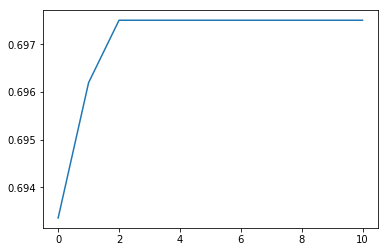

In [77]:
XTrain,TTrain,XTest,TTest = ml.partition(X,T,(.8,.2),classification=True)
nnet = nn.NeuralNetworkClassifier(X.shape[1],[0],3) 
nnet.train(XTrain,TTrain,nIterations = 10,errorPrecision=1.e-8, verbose=False)
PTrain,Prtrain,_ = nnet.use(XTrain,allOutputs=True)
PTest,Prtest,_ = nnet.use(XTest,allOutputs=True)
print('Confusion Matrix')
print()
ml.confusionMatrix(TTest,PTest,classes)
plt.plot(np.exp(-nnet.getErrorTrace()));

We are seeing very similar results with the linear logistic model compared to the LDA model: 'low' and 'high' classes are heavily getting biased. Now let's see how a non-linear model will work.

In [82]:
numNodes = hiddenLayers(5, 3)
resultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                     [ [ numNodes, 100], [numNodes, 200], [numNodes, 300] ],
                                                     nFolds=5, shuffle=False,verbose=False)
printResults('NN:',resultsNN)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:        [[7, 3], 300]   63.38   60.64   74.59
 NN:        [[7, 3], 300]   64.70   61.44   71.11
 NN:        [[7, 3], 300]   66.28   62.65   66.19
 NN:        [[7, 3], 300]   68.31   64.67   59.31
 NN:        [[7, 3], 200]   68.94   67.67   46.03


In [83]:
printAvg("NN", resultsNN)

-------------------------------------------------
Average:                        66.32   63.41   63.45


In [84]:
Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(0.8,0.2),classification=True)

In [85]:
nnet = nn.NeuralNetworkClassifier(X.shape[1],numNodes,3) 
nnet.train(Xtrain,Ttrain,nIterations = 200,errorPrecision=1.e-8, verbose=True)

SCG: Iteration 20 ObjectiveF=0.35548 Scale=1.395e-03 Time=0.00136 s/iter
SCG: Iteration 40 ObjectiveF=0.33896 Scale=6.976e-04 Time=0.00135 s/iter
SCG: Iteration 60 ObjectiveF=0.32973 Scale=6.653e-10 Time=0.00144 s/iter
SCG: Iteration 80 ObjectiveF=0.32658 Scale=1.000e-15 Time=0.00155 s/iter
SCG: Iteration 100 ObjectiveF=0.32555 Scale=1.000e-15 Time=0.00138 s/iter
SCG: Iteration 120 ObjectiveF=0.32512 Scale=6.554e-11 Time=0.00062 s/iter
SCG: Iteration 140 ObjectiveF=0.32335 Scale=1.074e-06 Time=0.00143 s/iter
SCG: Iteration 160 ObjectiveF=0.32257 Scale=1.024e-12 Time=0.00138 s/iter
SCG: Iteration 180 ObjectiveF=0.32193 Scale=1.000e-15 Time=0.00138 s/iter
SCG: Iteration 200 ObjectiveF=0.32107 Scale=1.000e-15 Time=0.00136 s/iter


NeuralNetwork(5, [7, 3], 3)
   Network was trained for 200 iterations. Final error is 0.3210711659426263.


       0    1    2
    ------------------
 0 | 55.9 23.3 20.9   (2286 / 2286)
 1 | 25.6 31.8 42.6   (2246 / 2246)
 2 | 11.6 21.5 66.8   (2303 / 2303)


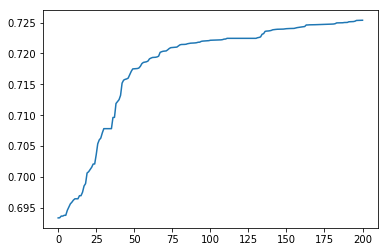

In [88]:
classes = np.unique(Ttest)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
print()
ml.confusionMatrix(Ttest,Ptest,classes)
plt.plot(np.exp(-nnet.getErrorTrace()));

9.46079908388 0.0159748113858 771.604938272
10.5416946953 0.519394939506 771.604938272


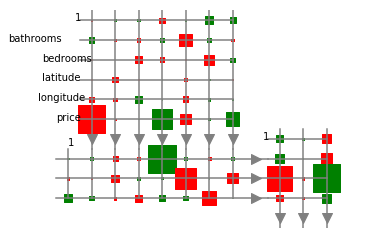

In [89]:
nnet.draw(inputNames=Xnames)

We can start to see that with a non-linear graph we are starting to get a better model. However, contrary to the LDA model we are starting to see a heavy bias as price being one of the greatest predicting factors. Bathroom and bedroom have slight influences on the model, they are not as significant as price. Latitude and longitude have little influence on the model. 

Let see how price, bedrooms, bathrooms, and location(longitude/latitude) are distributed within the data in relation to the renter's interest in the property. We will begin with number of bathrooms.

In [92]:
featureColumns =[0,1,8,10,13]
targetColumn = 15
trainMatrix = trainData.as_matrix()
Xdist = trainMatrix[:, featureColumns]
Tdist = trainMatrix[:, targetColumn:targetColumn+1]
lowI, _ = np.where(Tdist == 0)
medI, _ = np.where(Tdist == 1)
highI, _ = np.where(Tdist == 2)
lowX = Xdist[lowI, :]
medX = Xdist[medI, :]
highX = Xdist[highI, :]
lowX = lowX.astype(float)
medX = medX.astype(float)
highX = highX.astype(float)
avgLow = np.mean(lowX, axis=0)
avgMed = np.mean(medX, axis=0)
avgHigh = np.mean(highX, axis=0)

In [93]:
avgBath = [avgLow[0], avgMed[0], avgHigh[0]]
avgBed = [avgLow[1], avgMed[1], avgHigh[1]]

In [94]:
avgBath

[1.2387411037218528, 1.1639059577878708, 1.1161760875227924]

In [95]:
avgBed

[1.5147590712868977, 1.6220500489803189, 1.5464964834592341]

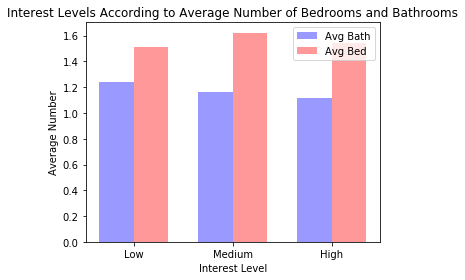

In [99]:
n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, avgBath, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Avg Bath')

rects1 = plt.bar(index+bar_width, avgBed, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Avg Bed')

plt.xlabel('Interest Level')
plt.ylabel('Average Number')
plt.title('Interest Levels According to Average Number of Bedrooms and Bathrooms')
plt.xticks(index + bar_width / 2, ('Low', 'Medium', 'High'))
plt.legend()

plt.tight_layout()
plt.show()

From the above graph we can see in terms of number of bedrooms and bathrooms, there is little difference between 'low', 'med', and 'high' interest levels. The average number of bathrooms for the three interest levels are: 1.24, 1.16, 1.12 respectively and the respective average number of bedrooms for the three interest levels are: 1.51, 1.62, 1.55. The greatest difference between the average bathrooms is 0.12 and the greatest difference between the average bedrooms is 0.11. This could be an indicator that number of bedrooms and number of bathrooms is a bad indicator of interest level. 

In [100]:
avgPrice = [avgLow[4], avgMed[4], avgHigh[4]]
avgPrice

[4176.599142457123, 3158.7673880131802, 2700.2930450638187]

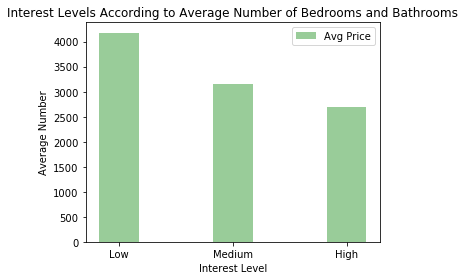

In [107]:
n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, avgPrice, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Avg Price')

plt.xlabel('Interest Level')
plt.ylabel('Average Number')
plt.title('Interest Levels According to Average Number of Bedrooms and Bathrooms')
plt.xticks(index , ('Low', 'Medium', 'High'))
plt.legend()

plt.tight_layout()
plt.show()

Price is a much different story. From the graph above we can see a clear discrepancy between the average price for 'high' interest level and 'low' interest level. The average prices for the three interest levels are: 'low': \$4176.60, 'med': \$3158.77, 'high': \$2700.29, with the largest difference being: \$1476.31.

Let's see how location is related to the interest level

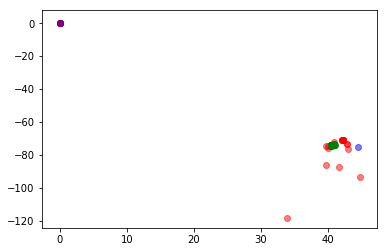

In [111]:
plt.scatter(lowX[:,2], lowX[:,3], c='r', alpha=0.5)
plt.scatter(medX[:,2], medX[:,3], c='b', alpha=0.5)
plt.scatter(highX[:,2], highX[:,3], c='g', alpha=0.5)
plt.show()

Now let us try to the outliers

In [155]:
def removeOutliers(data, m):
    m = 2
    uLat = np.mean(data[:, 2])
    sLat = np.std(data[:, 2])
    a = np.array([[0, 0, 0, 0, 0]])
    for e in data:
        if (uLat - m*sLat < e[2] < uLat + m *sLat):
            c = np.array([e])
            a = np.concatenate((a, c), axis=0)
    reOut = a[1:,:]
    b = np.array([[0, 0, 0, 0, 0]])
    uLong = np.mean(data[:, 3])
    sLong = np.std(data[:, 3])
    for e in reOut:
        if (uLat - m*sLong < e[3] < uLat + m *sLong):
            d = np.array([e])
            b = np.concatenate((b, d), axis=0)
    reOut2 = b[1:,:]
    return reOut

In [151]:
data = lowX
m = 2
uLat = np.mean(data[:, 2])
sLat = np.std(data[:, 2])
#filteredLat = [e for e in data if (uLat - m*sLat < e[2] < uLat + m *sLat)]
a = np.array([[0, 0, 0, 0, 0]])
for e in data:
    if (uLat - m*sLat < e[2] < uLat + m *sLat):
        c = np.array([e])
        a = np.concatenate((a, c), axis=0)
        
a[1:,:]

array([[  1.00000000e+00,   2.00000000e+00,   4.07947000e+01,
         -7.39667000e+01,   5.46500000e+03],
       [  1.00000000e+00,   1.00000000e+00,   4.07539000e+01,
         -7.39677000e+01,   3.27500000e+03],
       [  1.00000000e+00,   4.00000000e+00,   4.08241000e+01,
         -7.39493000e+01,   3.35000000e+03],
       ..., 
       [  1.00000000e+00,   1.00000000e+00,   4.07601000e+01,
         -7.39900000e+01,   2.59500000e+03],
       [  1.00000000e+00,   0.00000000e+00,   4.07066000e+01,
         -7.40101000e+01,   3.35000000e+03],
       [  1.00000000e+00,   2.00000000e+00,   4.08699000e+01,
         -7.39172000e+01,   2.20000000e+03]])

In [176]:
lowXUp = removeOutliers(lowX, .25)
medXUp = removeOutliers(medX, 2)
highXUp = removeOutliers(highX, 2)

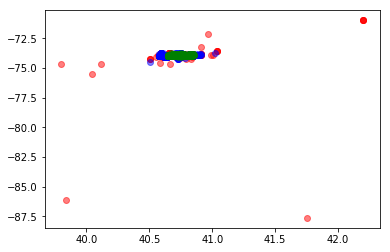

In [177]:
plt.scatter(lowXUp[:,2], lowXUp[:,3], c='r', alpha=0.5)
plt.scatter(medXUp[:,2], medXUp[:,3], c='b', alpha=0.5)
plt.scatter(highXUp[:,2], highXUp[:,3], c='g', alpha=0.5)
plt.show()

In [181]:
lowXUp2 = removeOutliers(lowXUp, 2)
medXUp2 = removeOutliers(medXUp, 2)
highXUp2 = removeOutliers(highXUp, 2)

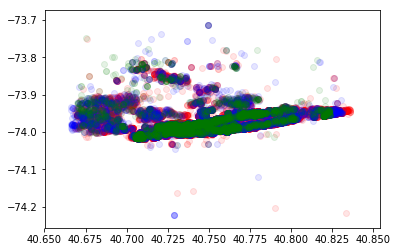

In [186]:
plt.scatter(lowXUp2[:,2], lowXUp2[:,3], c='r', alpha=0.1)
plt.scatter(medXUp2[:,2], medXUp2[:,3], c='b', alpha=0.1)
plt.scatter(highXUp2[:,2], highXUp2[:,3], c='g', alpha=0.1)
plt.show()

## Results

Our final results is the neural network the standard numerical features. It uses two hidden layers of 7 and 2 units respectively. Our model was able to most accurately predict the low and high interest levels, however, had a difficult time predicting medium interest levels. To improve this we would need to spend more time engineering better features for our model to learn on.


       0    1    2
    ------------------
 0 | 55.9 23.3 20.9   (2286 / 2286)
 1 | 25.6 31.8 42.6   (2246 / 2246)
 2 | 11.6 21.5 66.8   (2303 / 2303)


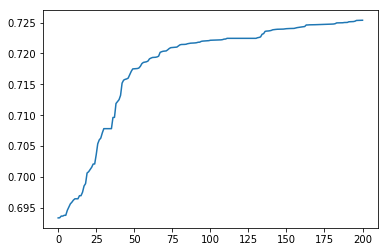

In [178]:
classes = np.unique(Ttest)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
print()
ml.confusionMatrix(Ttest,Ptest,classes)
plt.plot(np.exp(-nnet.getErrorTrace()));

## Conclusion

From out exploration of the data set we were able to achieve an average test accuracy of 63.45% using a neural network with two hidden layers with 7 and 3 units respectively and 300 iterations. We then began to look at the data and see how the data was distributed between low, medium, and high interest levels. We found out that the number of bedrooms and bathrooms in a rent had little correlation with the interest level. This could be due to the fact that there are the majority of people living in New York are looking for 1-2 bedrooms and bathrooms in their next rental. This could also be due to fact that the average number of bedrooms and bathrooms in a rental is 1-2. We then looked at the price distribution between low, medium and high and found a great correlation between price and interest level. The average price for high interest level listings was close to \$1500 less than the average price for a low interest level posting. This is coincides with the common knowledge that cheaper rental listings are more attractive to renters. Finally we looked at how the location was related to interest, we saw high outliers that had to removed, but after examining the data we were not able to find conclusive evidence that location sparked different levels of interest. This does not match with common knowledge, and if given more time, we would have liked to improve the location feature. In the future we would like to spend more time exploring and engineering different features for our machine learning model. 

## References

G. B. Huang, “Learning capability and storage capacity of two-hidden-layer feedforward networks,” IEEE Transactions on Neural Networks, vol. 14, no. 2, pp. 274–281, 2003.